In [19]:
%load_ext autoreload
%autoreload 2

from ctapipe.io import event_source
import sys
 
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import sys
from scipy.stats import norm
from traitlets.config.loader import Config 
from ctapipe import utils

# ctapipe modules
from ctapipe.visualization import CameraDisplay
from ctapipe.plotting.camera import CameraPlotter
from ctapipe.image.extractor import *
from ctapipe.io.containers import PedestalContainer
from ctapipe.io.hdf5tableio import HDF5TableWriter, HDF5TableReader
from lstchain.calib.camera.r0 import LSTR0Corrections
from lstchain.calib.camera.calibrator import LSTCameraCalibrator
from lstchain.calib.camera.calibrator import LSTCameraCalibrator




# r0 to r1 calibrator
r0_r1_calibrator = LSTR0Corrections(
    pedestal_path="/media/pawel1/ADATA HD330/20190926/pedestal_1402_0000_3.fits",
    r1_sample_start=2,r1_sample_end=38, tel_id=1)

# r1 to dl1 calibrator


inp="calibration_run1409.hdf5"
charge_config = Config({
    "LocalPeakWindowSum": {
        "window_shift": 4,
        "window_width": 11 
    }
})

r1_dl1_calibrator = LSTCameraCalibrator(calibration_path = inp,
                               image_extractor="LocalPeakWindowSum",
                               config=charge_config, allowed_tels=[1])

# shower events
run = 1402
#datadir = '/ctadata/franca/LST' 
datadir = '/media/pawel1/ADATA HD330/20190926'
file = f'{datadir}/LST-1.1.Run0{run}.0000.fits.fz'
reader = event_source(file, max_events=1000)

# useful variables
channel=['HG','LG']
tel_id=1 # LST1 for the moment

print(f"\n Read {len(reader.multi_file)} total events  in files\n")
print(f"{reader.file_list} ")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

 Read 53000 total events  in files

['/media/pawel1/ADATA HD330/20190926/LST-1.4.Run01402.0000.fits.fz', '/media/pawel1/ADATA HD330/20190926/LST-1.3.Run01402.0000.fits.fz', '/media/pawel1/ADATA HD330/20190926/LST-1.2.Run01402.0000.fits.fz', '/media/pawel1/ADATA HD330/20190926/LST-1.1.Run01402.0000.fits.fz'] 


In [20]:
waveform_list = []
for i, event in enumerate(reader):
    
    # calibrate r0 --> r1        
    r0_r1_calibrator.calibrate(event)
   
    
    # if triggerd event
    if event.r0.tel[tel_id].trigger_type == 1:                   
        
        # calibrate r1 --> dl1
        r1_dl1_calibrator(event)
        waveform_list.extend(event.dl0.tel[tel_id].waveform[0, 150])

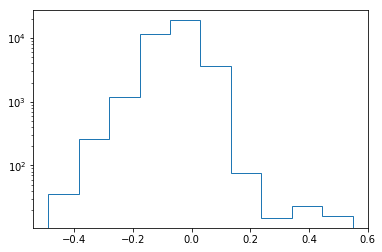

In [26]:
plt.hist(waveform_list, bins=10, histtype='step')
plt.yscale('log')

In [22]:
np.std(waveform_list)

0.07225910980638248

In [23]:
np.mean(waveform_list)

-0.05116631831785028